# Exploratory data analysis on videogames sales

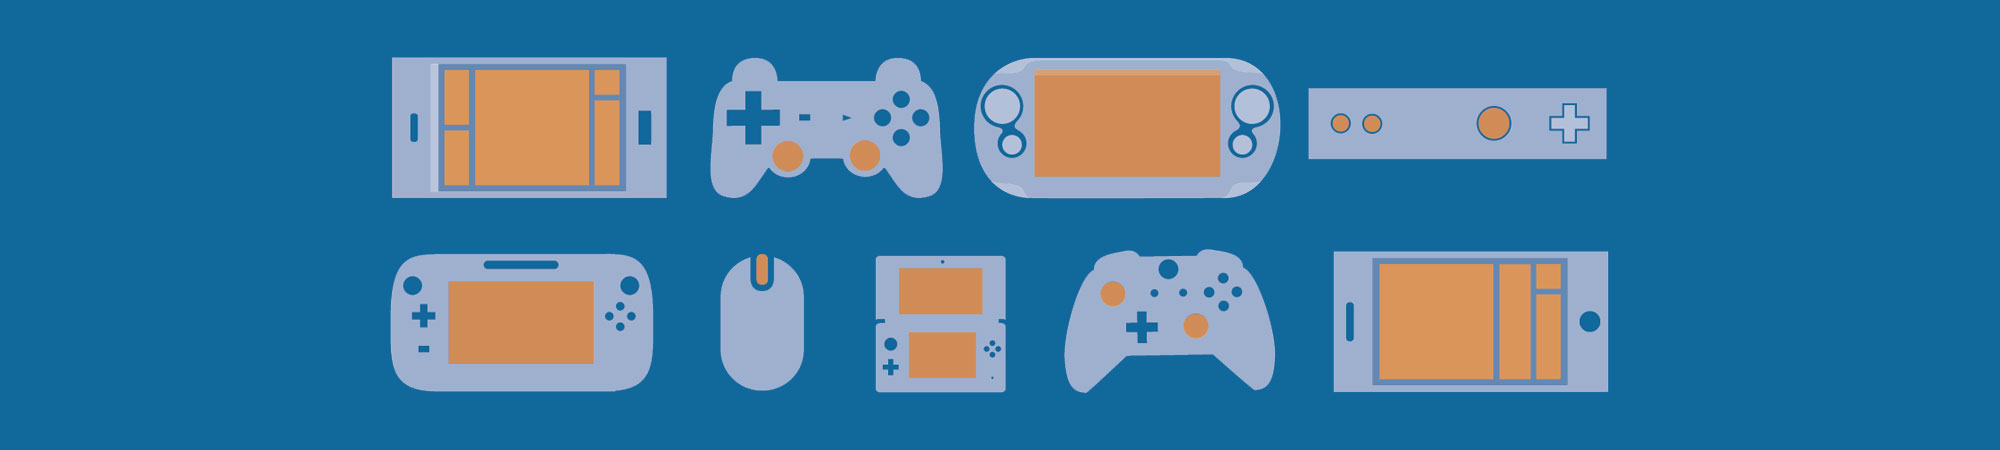

##### In this kernel I seek to connect 2 of my great passions: data science and video games. As this is my first solo project, I am going to focus mostly on explorative data analysis and storytelling.
##### The main objective is to analyze video game sales linked to different variables, such as genre, region or developer company, making use of visualization tools for a correct interpretation. I would like to answer this questions:

##### a) What are the global sales looking like across time?
##### b) Who are the top publishers, and why are they the top?
##### c) what genres of games are people playing?

### Importing libraries & data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.tools import FigureFactory as ff
import matplotlib.pyplot as plt

In [2]:
vgsales = pd.read_csv('vgsales.csv')

In [3]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Here we can see that this dataset contains 11 columns, wich are:
      Rank: Ranking of overall sales. Integer.
      Name: Game name. Object
      Platform: Platform where the game was released (PC, PS3, WII, etc). Object
      Year: Year where the game was released. Float
      Genre: Genre of the game. Object.
      Publisher: Publisher of the game. Object
      NA_Sales: Sales in NA, expressed in millions. Float
      EU_Sales: Sales in Europe, expressed in millions. Float
      JP_Sales: Sales in Japan, expressed in millions. Float
      Other_Sales: Sales in the rest of the world, expressed in millions. Float
      Global_Sales: Worldwide sales, expressed in millions. Float

#### Also, there are some n/a in the 'Year' column and its type is float64, so I'm going to fix this 2 things: 

In [4]:
### a) Drop the samples with missing values
### b) index needs to be reset after deleted samples
### c) updating rank column after reset

vgsales = vgsales.dropna()

vgsales = vgsales.reset_index(drop = True)

vgsales.loc[:, 'Rank'] = np.arange(vgsales.shape[0])+1

In [5]:
### As shown in vgsales.info, the year is showing floating point number. 
### We will change that to an integer for display purposes.

vgsales['Year'] = vgsales['Year'].astype(int)

In [6]:
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


###### Now, everything I need is on his place, so let's start with the analysis

In [7]:
# Lets create a dataset with the 100 most sold games, visualising the data by region comparing them:

top100 = vgsales.head(100)

In [8]:
trace1 = go.Scatter(
                    x = top100.Rank,
                    y = top100.NA_Sales,
                    mode = "markers",
                    name = "North America",
                    marker = dict(color = 'rgba(28, 149, 249, 0.8)',size=8),
                    text= top100.Name)

trace2 = go.Scatter(
                    x = top100.Rank,
                    y = top100.EU_Sales,
                    mode = "markers",
                    name = "Europe",
                    marker = dict(color = 'rgba(249, 94, 28, 0.8)',size=8),
                    text= top100.Name)
trace3 = go.Scatter(
                    x = top100.Rank,
                    y = top100.JP_Sales,
                    mode = "markers",
                    name = "Japan",
                    marker = dict(color = 'rgba(150, 26, 80, 0.8)',size=8),
                    text= top100.Name)
trace4 = go.Scatter(
                    x = top100.Rank,
                    y = top100.Other_Sales,
                    mode = "markers",
                    name = "Other",
                    marker = dict(color = 'green',size=8),
                    text= top100.Name)
                    

data = [trace1, trace2,trace3,trace4]
layout = dict(title = 'North America, Europe, Japan and Other Sales of Top 100 Video Games',
              xaxis= dict(title= 'Rank',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white"),
              yaxis= dict(title= 'Sales(In Millions)',ticklen= 5,zeroline= False,zerolinewidth=1,gridcolor="white",),
              paper_bgcolor='rgb(243, 243, 243)',
              plot_bgcolor='rgb(243, 243, 243)' )
fig = dict(data = data, layout = layout)
iplot(fig)

#### As we can see, Wii Sports is (by far) the most sold game both in a global perspective as in North America and Europe. This can be cause by two things: It was the first game ever using motion sensor and it came in a bundle with every Wii console sold in those 2 continents. (Wii has sold more than 101 millions of units around the world).

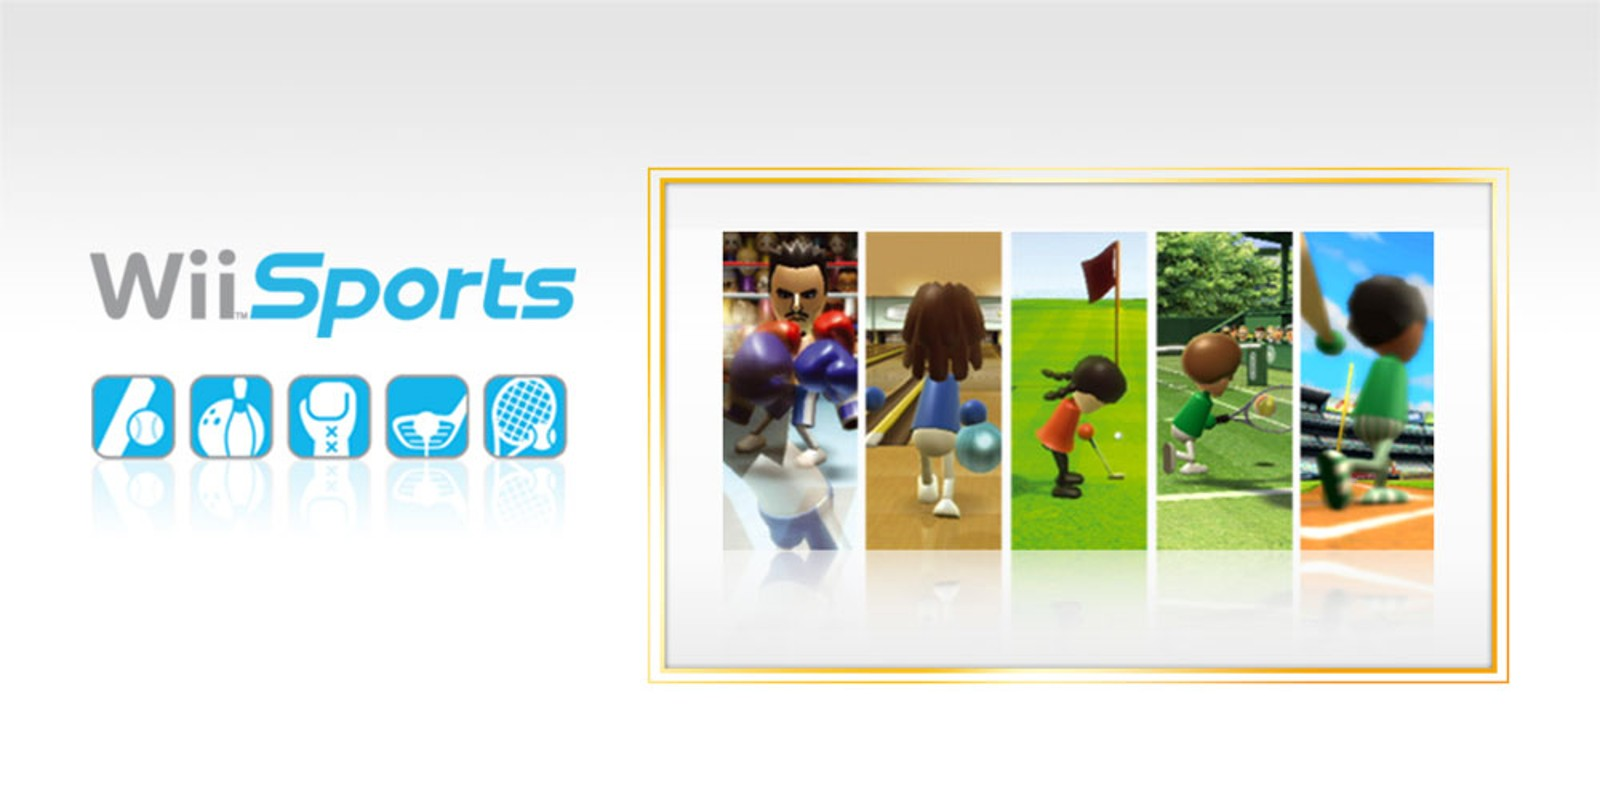

#### Wii Sports is a sports video game developed and published by Nintendo for the Wii video game console. The game was released in North America along with the Wii on November 19, 2006, and was released in Japan, Australia, and Europe the following month.The game is a collection of five sports simulations, designed to demonstrate the motion-sensing capabilities of the Wii Remote. The five sports included are tennis, baseball, bowling, golf and boxing. (resource: Wikipedia)

#### If we pay attention, the first 5 positions belong (because I know the games) to Nintendo, so the next thing I want to analyze will be this top-100 depending on the developer:

## Now, lets see wich developer has more games into this top 100:

In [9]:
trace = go.Histogram(x=top100.Publisher,marker=dict(color="crimson",line=dict(color='black', width=2)),opacity=0.75)
layout = go.Layout(
    title='Numbers of Top 100 Video Games Publishers',
    xaxis=dict(
        title='Publishers'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

#### 52 of these 100 games were published by Nintendo, being that the second company that has developed the most games is Activision, with just 14 games.

# NINTENDO
### Nintendo Co., Ltd. is a Japanese multinational consumer electronics and video game company headquartered in Kyoto ,founded on 23 September 1889 by Fusajiro Yamauchi. Nintendo is one of the world's largest video game companies by market capitalization, creating some of the best-known and top-selling video game franchises, such as Mario, The Legend of Zelda, and Pokémon. It originally produced handmade hanafuda playing cards. By 1963, the company had tried several small niche businesses, such as cab services and love hotels. Abandoning previous ventures in favor of toys in the 1960s, Nintendo developed into a video game company in the 1970s, ultimately becoming one of the most influential in the industry and Japan's third most-valuable company with a market value of over 85 billion in 2007. (source=Wikipedia)
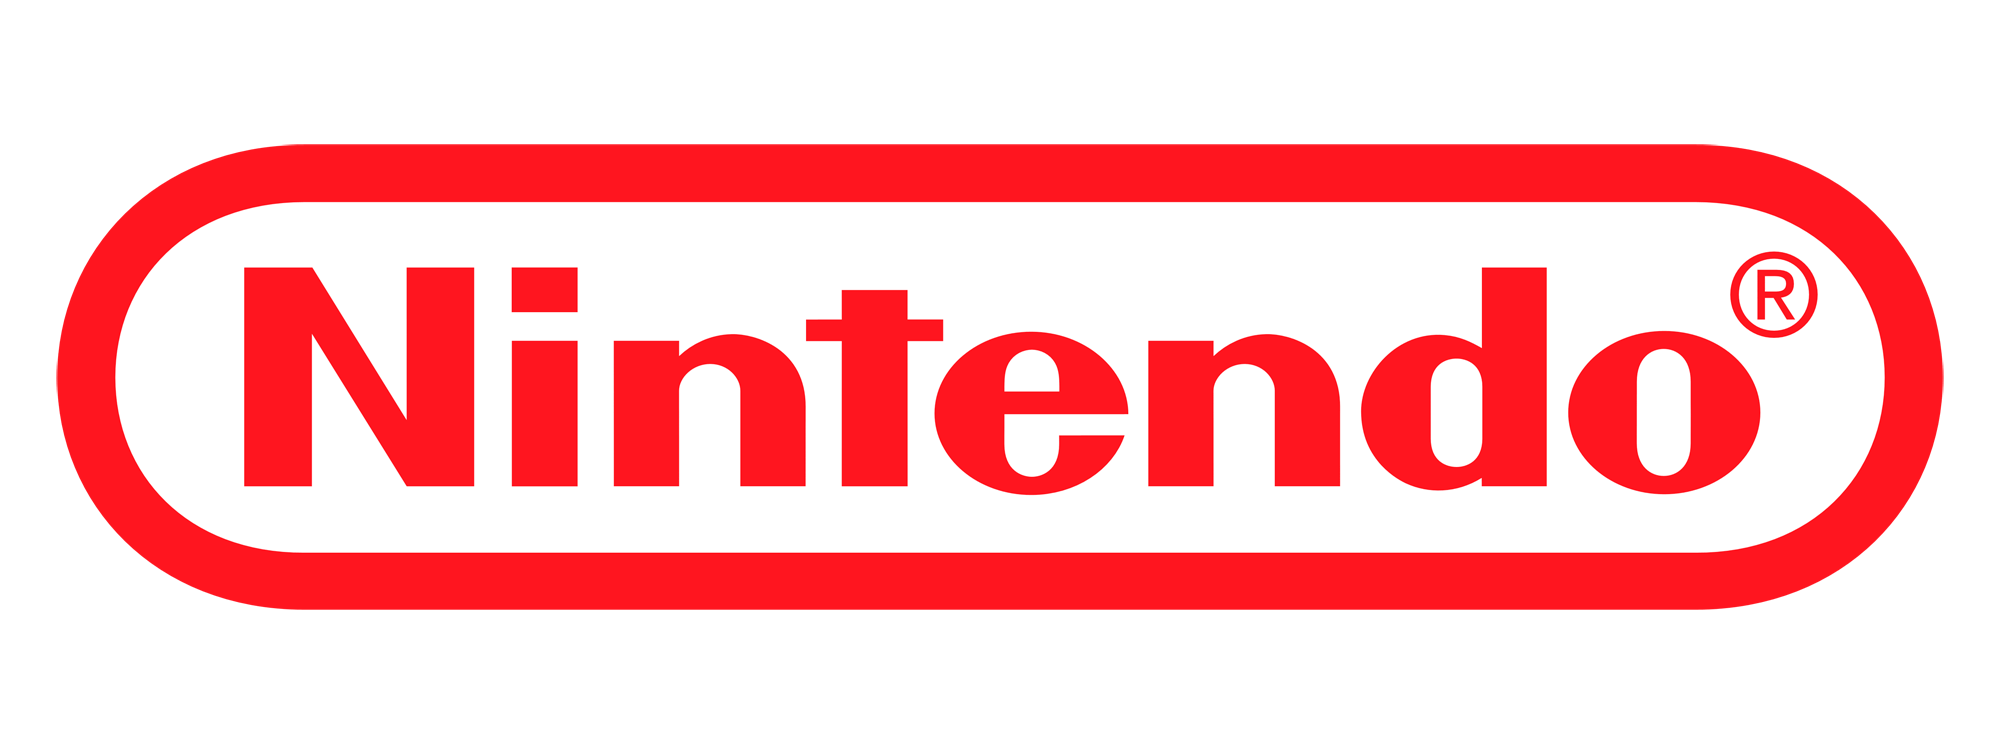



### Now, let's take a look on Genre VS Platform

In [10]:
xaction=vgsales[vgsales.Genre=="Action"]
xsports=vgsales[vgsales.Genre=="Sports"]
xmisc=vgsales[vgsales.Genre=="Misc"]
xrole=vgsales[vgsales.Genre=="Role-Playing"]
xshooter=vgsales[vgsales.Genre=="Shooter"]
xadventure=vgsales[vgsales.Genre=="Adventure"]
xrace=vgsales[vgsales.Genre=="Racing"]
xplatform=vgsales[vgsales.Genre=="Platform"]
xsimulation=vgsales[vgsales.Genre=="Simulation"]
xfight=vgsales[vgsales.Genre=="Fighting"]
xstrategy=vgsales[vgsales.Genre=="Strategy"]
xpuzzle=vgsales[vgsales.Genre=="Puzzle"]

In [15]:
trace1 = go.Histogram(
    x=xaction.Platform,
    opacity=0.75,
    name = "Action",
    marker=dict(color='rgb(165,0,38)'))
trace2 = go.Histogram(
    x=xsports.Platform,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(215,48,39)'))
trace3 = go.Histogram(
    x=xmisc.Platform,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(244,109,67)'))
trace4 = go.Histogram(
    x=xrole.Platform,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color='rgb(253,174,97)'))
trace5 = go.Histogram(
    x=xshooter.Platform,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color='rgb(254,224,144)'))
trace6 = go.Histogram(
    x=xadventure.Platform,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(170,253,87)'))
trace7 = go.Histogram(
    x=xrace.Platform,
    opacity=0.75,
    name = "Racing",
    marker=dict(color='rgb(171,217,233)'))
trace8 = go.Histogram(
    x=xplatform.Platform,
    opacity=0.75,
    name = "Platform",
    marker=dict(color='rgb(116,173,209)'))
trace9 = go.Histogram(
    x=xsimulation.Platform,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color='rgb(69,117,180)'))
trace10 = go.Histogram(
    x=xfight.Platform,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color='rgb(49,54,149)'))
trace11 = go.Histogram(
    x=xstrategy.Platform,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color="rgb(10,77,131)"))
trace12 = go.Histogram(
    x=xpuzzle.Platform,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(1,15,139)'))

data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout = go.Layout(barmode='stack',
                   title='Genre Counts According to Platform',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Count'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

What does this graphic means? It shows the number of games per genre according to the platform. For exaple, in the PS3 section, there are 373 Action games, 210 Sports games, 117 Role-Playing games and so on. And, as it can be seen, Sony PS2 and Nintendo DS are the platforms with most games. 

The graph below shows the total amount of global sales according to the genre and platforms of the games in the data set. For example, for the PS3 platform, 304.02 million sports games are sold globally , or 277.23 million shooter games have been sold for the X360.

In [16]:
trace1 = go.Bar(
    x=xaction.groupby("Platform")["Global_Sales"].sum().index,
    y=xaction.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Action",
    marker=dict(color="rgb(119,172,238)"))
trace2 = go.Bar(
    x=xsports.groupby("Platform")["Global_Sales"].sum().index,
    y=xsports.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Sports",
    marker=dict(color='rgb(21,90,174)'))
trace3 = go.Bar(
    x=xrace.groupby("Platform")["Global_Sales"].sum().index,
    y=xrace.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Racing",
    marker=dict(color="rgb(156,245,163)"))
trace4 = go.Bar(
    x=xshooter.groupby("Platform")["Global_Sales"].sum().index,
    y=xshooter.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Shooter",
    marker=dict(color="rgb(14,135,23)"))
trace5 = go.Bar(
    x=xmisc.groupby("Platform")["Global_Sales"].sum().index,
    y=xmisc.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Misc",
    marker=dict(color='rgb(252,118,103)'))
trace6 = go.Bar(
    x=xrole.groupby("Platform")["Global_Sales"].sum().index,
    y=xrole.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Role Playing",
    marker=dict(color="rgb(226,28,5)"))
trace7 = go.Bar(
    x=xfight.groupby("Platform")["Global_Sales"].sum().index,
    y=xfight.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Fighting",
    marker=dict(color="rgb(247,173,13)"))
trace8 = go.Bar(
    x=xplatform.groupby("Platform")["Global_Sales"].sum().index,
    y=xplatform.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Platform",
    marker=dict(color="rgb(242,122,13)"))
trace9 = go.Bar(
    x=xsimulation.groupby("Platform")["Global_Sales"].sum().index,
    y=xsimulation.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Simulation",
    marker=dict(color="rgb(188,145,202)"))
trace10 = go.Bar(
    x=xadventure.groupby("Platform")["Global_Sales"].sum().index,
    y=xadventure.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Adventure",
    marker=dict(color='rgb(104,57,119)'))
trace11 = go.Bar(
    x=xstrategy.groupby("Platform")["Global_Sales"].sum().index,
    y=xstrategy.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Strategy",
    marker=dict(color='rgb(245,253,104)'))
trace12 = go.Bar(
    x=xpuzzle.groupby("Platform")["Global_Sales"].sum().index,
    y=xpuzzle.groupby("Platform")["Global_Sales"].sum().values,
    opacity=0.75,
    name = "Puzzle",
    marker=dict(color='rgb(138,72,40)'))

data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
layout = go.Layout(barmode='stack',
                   title='Total Global Sales According to Platform and Genre',
                   xaxis=dict(title='Platform'),
                   yaxis=dict( title='Global Sales(In Millions)'),
                   paper_bgcolor='beige',
                   plot_bgcolor='beige'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Now, let's take a look to genre VS region

In [17]:
genre=pd.DataFrame(vgsales.groupby("Genre")[["NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].sum())
genre.reset_index(level=0, inplace=True)
genrecount=pd.DataFrame(vgsales["Genre"].value_counts())
genrecount.reset_index(level=0, inplace=True)
genrecount.rename(columns={"Genre": "Counts","index":"Genre"}, inplace=True)

genre=pd.merge(genre,genrecount,on="Genre")

In [18]:
table_data=genre[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
table_data = table_data.rename(columns = {"NA_Sales": "North America", 
                                  "EU_Sales":"Europe", 
                                  "JP_Sales": "Japan","Other_Sales":"Other","Global_Sales":"Total"})

In [19]:
x=genre.Genre
NA_Perce=list(genre["NA_Sales"]/genre["Global_Sales"]*100)
EU_Perce=list(genre["EU_Sales"]/genre["Global_Sales"]*100)
JP_Perce=list(genre["JP_Sales"]/genre["Global_Sales"]*100)
Other_Perce=list(genre["Other_Sales"]/genre["Global_Sales"]*100)

trace1 = go.Bar(
    x=x,
    y=NA_Perce,
    name="North America" ,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75)
trace2 = go.Bar(
    x=x,
    y=EU_Perce,
    xaxis='x2', yaxis='y2',
    marker=dict(
        color='red',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Europe",
    )
trace3 = go.Bar(
    x=x,
    y=JP_Perce,
    xaxis='x2', yaxis='y2',
  
    marker=dict(
        color='orange',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Japan",
    )
trace4 = go.Bar(
    x=x,
    y=Other_Perce,
    xaxis='x2', yaxis='y2',
    
    marker=dict(
        color='purple',
        line=dict(
            color='rgb(8,48,107)',
            width=3),
        ),
    opacity=0.75,
    name = "Other",)
trace5=go.Table(
  header = dict(
    values = table_data.columns,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["darkslateblue","blue","red", "orange","purple","green"]),
    align = ['left','center'],
    font = dict(color = 'white', size = 12),
     height=30,
  ),
  cells = dict(
    values = [table_data.Genre,round(table_data["North America"]),round(table_data["Europe"]), round(table_data["Japan"]), round(table_data["Other"]),round(table_data["Total"])],
    height=30,
    line = dict(color = 'rgb(8,48,107)',width=3),
    fill = dict(color = ["silver","rgb(158,202,225)","darksalmon", "gold","mediumorchid","yellowgreen"]),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12)),
    domain=dict(x=[0.60,1],y=[0,0.95]),
)

data = [trace1, trace2,trace3,trace4,trace5]
layout = go.Layout(barmode='stack',autosize=False,width=1200,height=650,
                legend=dict(x=.58, y=0,orientation="h",font=dict(family='Courier New, monospace',size=11,color='#000'),
                           bgcolor='beige', bordercolor='beige', borderwidth=1),
                title='North America, Europe, Japan and Other Sales Percentage and Amounts According to Genre',
                titlefont=dict(family='Courier New, monospace',size=17,color='black'),
                xaxis2=dict(domain=[0, 0.50],anchor="y2", title='Genre',titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')), yaxis2=dict( domain=[0, 1],anchor='x2',title="Total Percentage",titlefont=dict(family='Courier New, monospace'),tickfont=dict(family='Courier New, monospace')),
                paper_bgcolor='beige',plot_bgcolor='beige',
                annotations=[ dict( text='Sales Percentage According to Region',x=0.08,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family="Courier New, monospace"),bgcolor="lightyellow",borderwidth=5),dict( text='Total Sales(In Millions)',x=0.9,y=1.02,xref="paper",yref="paper",showarrow=False,font=dict(size=15,family='Courier New, monospace'),bgcolor="lightyellow",borderwidth=5)],
              
                  )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

#### The graph on the left shows us the percentages of game genre by region. As we can see, approximately 50 percent of the total sales of the action genre were sold in North America. You can see these values in the table on the right. For example, the total sales of Action genre games are 1723 millions, and 862 millions of these sales were in Japan.

#### Overall, when we look at the genres of games, we see that sales percentages in North America are in the range of 44-56 percent, excluding Role-Playing and Strategy. But if wee check what happen in Japan, mostly role-playing genre is sold and the shooter games were sold less than the other regions. In Europe these genres are Racing and Puzzle. In other regions, we can say that these genre of games are Racing, Action and Sports. We also see the most sold genres are Action, Shooter and Sports game types in North America

### Lastly, I will analyze how video game sales were historically from 1980 to the present

In [20]:
game_list = pd.crosstab(vgsales['Platform'], 
            vgsales['Year'], margins=True, 
            margins_name="Total", 
           ).T
game_list

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne,Total
Year,,,,,,,,,,,,,,,,,,,,,
1980,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1981,46,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46
1982,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36
1983,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
1984,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1985,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1986,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
1987,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
1988,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


#### This table let us see that the gaming industry has been actively grown since 1994 with a peek in the years between 2006 - 2011. Then, it falls to levels from the start of the 00' decade. This can be caused due to the increasing cost (time and money) of developing newer games in the last decade. 

#### To clarify and see how the trend goes, let's make an histogram of this:

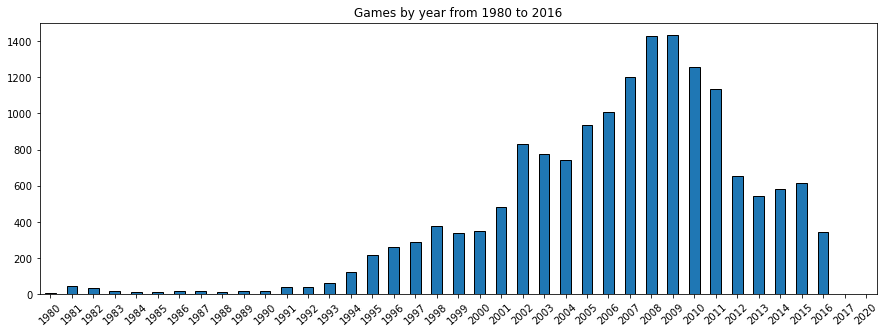

In [21]:
vgsales.groupby('Year')['Name'].count().plot(
            kind='bar', y='name', figsize=(15,5), edgecolor='black'
)
plt.title('Games by year from 1980 to 2016')
plt.xticks(rotation=42)
plt.xlabel('')
plt.show()

### Now, lets take a look at the sales of games for platform

In [22]:
vgsales.groupby('Platform')['Global_Sales'].sum().to_frame(
                                                        'Global_Sales').sort_values(
                                                        by='Global_Sales', ascending=False
                                                        ).head(10)

,Global_Sales
Platform,
PS2,1233.46
X360,969.60
PS3,949.35
Wii,909.81
DS,818.91
PS,727.39
GBA,305.62
PSP,291.71
PS4,278.10


#### Again, to clarify this table, lets use a histogram: 

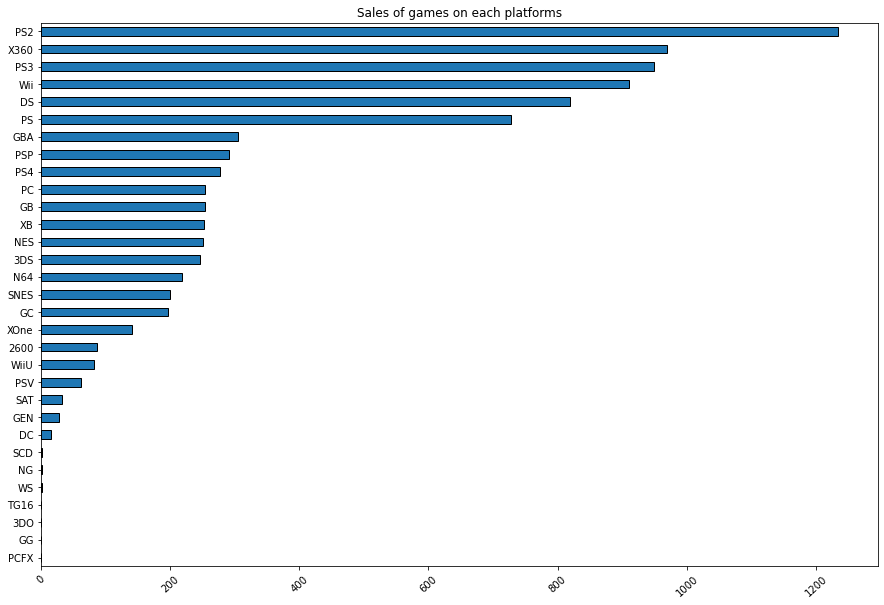

In [24]:
vgsales.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=True).plot(
            kind='barh', y='Global_Sales', figsize=(15,10), edgecolor='black'
)
plt.title('Sales of games on each platforms')
plt.xticks(rotation=42)
plt.xlabel('')
plt.ylabel('')
plt.show()

# Summary:

### What are the global sales looking like over time?

#### The global sales started to rise in the early 90's and for the most part, did not slow down(except for 2001/2002) until 2011. 2008/2009 were by far the golden era for video game (as far as this analysis goes). This coincides with the launch of the 7th generation consoles such as ps3 and xbox 360, which were released on November 2006. 

### Who are the top publishers, and why are they the top?.

#### Nintendo. They has proven year after year, the quality of their games are top notch. However, I have to give credit where credit is due. Activision shows the ability to make quality games. With Call of Duty releasing every year, and a younger generation that doesnt care as much about story lines and single player game modes, the online realm seems to be dominated by Activision. 

### Finally, what genres of games are people playing?

#### It depends on the region, but in general it can be said that the majority of games played by users are Action, Adventure and Shooter. I will make an honorable mention to Role-Playing games in Japan, where they are the most played (and my personal favorites c: )

## <span> _If you made it this far, I thank you for taking the time to do so. I am new to data science, but I really had a lot of fun doing this and consider I have learned a lot along the way! Any criticism or contribution means a lot to me. Greetings!_
 </span>

[My LinkedIn link ](https://www.linkedin.com/in/gonzaloperezcarrizo/)